<a href="https://colab.research.google.com/github/ClarisseAlvarenga/lives_twitch/blob/master/Balanceamento_Fraude_Cart%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CARREGAR OS DADOS

Usamos o dataset https://www.kaggle.com/mlg-ulb/creditcardfraud

### Importando nossas bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import RandomOverSampler

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from sklearn.metrics import RocCurveDisplay, confusion_matrix, classification_report, accuracy_score, auc

# VISUALIZAR OS DADOS

In [3]:
#lendo os dados
dados = pd.read_csv('creditcard.csv')

In [4]:
#visualizando as primeiras linhas
dados.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
#visualizando o tamanho do dataset
linhas,colunas = dados.shape


In [6]:
print(linhas)
print(colunas)

284807
31


In [7]:
#equivalente ao str() no R - info
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
#equivalente ao summary() no R - describe()
dados.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


# VERIFICAR OS NULOS

In [9]:
dados.isna().sum() # ele traz por coluna

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [10]:
dados.isna().sum().sum() # traz o total de nulos  no dataset

0

# DISTRIBUIÇÃO DE CLASSE

In [11]:
#numérica
dados.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [12]:
#porcentagem
dados.Class.value_counts(normalize=True)*100

0    99.827251
1     0.172749
Name: Class, dtype: float64

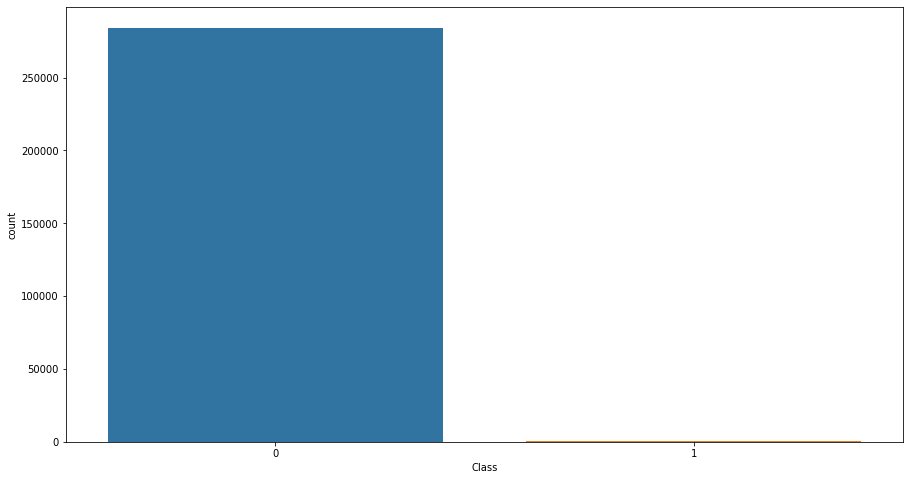

In [13]:
#visual
plt.figure(figsize=(15,8))
sns.countplot(dados.Class);
#plt.show()

# DIVIDIR ENTRE TREINO E TESTE

In [14]:
#importar o train test split
from sklearn.model_selection import train_test_split

In [15]:
X = dados.drop('Class', axis=1) #todas as variáveis menos a coluna Class
y = dados.Class #só a coluna Class

In [16]:
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [17]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [18]:
#dividiu os dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=7, stratify=y)

In [19]:
#proporção de 0 e 1 no y_train
y_train.value_counts(normalize=True)*100

0    99.827451
1     0.172549
Name: Class, dtype: float64

In [20]:
#proporção de 0 e 1 no y_test
y_test.value_counts(normalize=True)*100

0    99.826785
1     0.173215
Name: Class, dtype: float64

# MODELO ANTES DO BALANCEAMENTO

In [21]:
#criar o modelo
modelo_v1 = DecisionTreeClassifier(criterion='entropy')

In [22]:
#ajusta o modelo aos dados
modelo_v1.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [23]:
#primeira previsão
y_pred_1 = modelo_v1.predict(X_test)

### Avaliando o modelo antes do balanceamento

In [24]:
#visualizando a matriz de confusão
confusion_matrix(y_test,y_pred_1)

array([[85271,    24],
       [   38,   110]])

In [25]:
#vendo o classification report
print(classification_report(y_test, y_pred_1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.82      0.74      0.78       148

    accuracy                           1.00     85443
   macro avg       0.91      0.87      0.89     85443
weighted avg       1.00      1.00      1.00     85443



In [26]:
#vendo a acurácia
accuracy_score(y_test, y_pred_1)*100

99.92743700478681

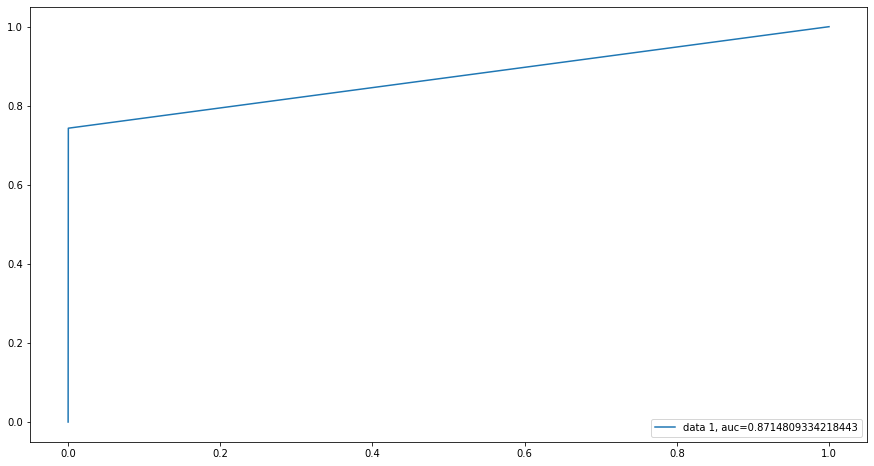

In [27]:
#vendo a Área sob a Curva antes do balanceamento
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, _ = roc_curve(y_test,  y_pred_1)
auc = roc_auc_score(y_test, y_pred_1)
plt.figure(figsize=(15,8))
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### Usar o balanceamento no modelo (class_weight)

In [28]:
#novo modelo
modelo_v2 = DecisionTreeClassifier(criterion='entropy', class_weight='balanced',)

In [29]:
#ajustando aos dados de treino
modelo_v2.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy')

In [30]:
#novas predições
y_pred_2 = modelo_v2.predict(X_test)

#### Avaliação 2

In [31]:
#visualizando a matriz de confusão
confusion_matrix(y_test,y_pred_2)

array([[85263,    32],
       [   42,   106]])

In [32]:
#vendo o classification report
print(classification_report(y_test, y_pred_2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.77      0.72      0.74       148

    accuracy                           1.00     85443
   macro avg       0.88      0.86      0.87     85443
weighted avg       1.00      1.00      1.00     85443



In [33]:
#vendo a acurácia
accuracy_score(y_test, y_pred_2)*100

99.9133925541004

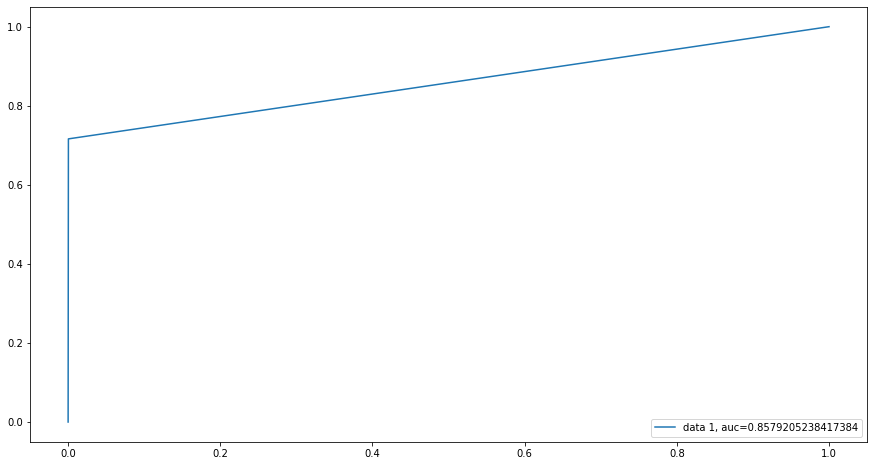

In [34]:
#vendo a Área sob a Curva usando o class_weight
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test,  y_pred_2)
auc = roc_auc_score(y_test, y_pred_2)
plt.figure(figsize=(15,8))
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# BALANCEAMENTO DA CLASSE ALVO

In [35]:
#criando o over sampler
ROSE = RandomOverSampler(random_state=1)

In [36]:
X_train_o, y_train_o = ROSE.fit_resample(X_train, y_train)

In [37]:
#ver a proporção entre as classes no novo y - que é um numpy array
unique, counts = np.unique(y_train_o, return_counts=True)
dict(zip(unique, counts))

{0: 199020, 1: 199020}

In [38]:
#balancear os dados de teste
X_test_o, y_test_o = ROSE.fit_resample(X_test, y_test)

In [39]:
#ver a proporção entre as classes no novo y - que é um numpy array
unique, counts = np.unique(y_test_o, return_counts=True)
dict(zip(unique, counts))

{0: 85295, 1: 85295}

# MODELO PÓS BALANCEAMENTO

In [40]:
#criando o novo modelo
modelo_v3 = DecisionTreeClassifier(criterion='entropy')

In [41]:
#ajustando o modelo aos dados balanceados
modelo_v3.fit(X_train_o,y_train_o)

DecisionTreeClassifier(criterion='entropy')

In [42]:
#predizendo os dados de teste não balanceados
y_pred_3 = modelo_v3.predict(X_test)

In [43]:
#predizendo os dados do teste balanceado
y_pred_4 = modelo_v3.predict(X_test_o)

### Avaliando o modelo após o balanceamento - Teste balanceado (y_pred_4)

In [44]:
#visualizando a matriz de confusão
confusion_matrix(y_test_o,y_pred_4)

array([[85264,    31],
       [23999, 61296]])

In [45]:
#vendo o classification report
print(classification_report(y_test_o, y_pred_4))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88     85295
           1       1.00      0.72      0.84     85295

    accuracy                           0.86    170590
   macro avg       0.89      0.86      0.86    170590
weighted avg       0.89      0.86      0.86    170590



In [46]:
#vendo a acurácia
accuracy_score(y_test_o, y_pred_4)*100

85.91359399730348

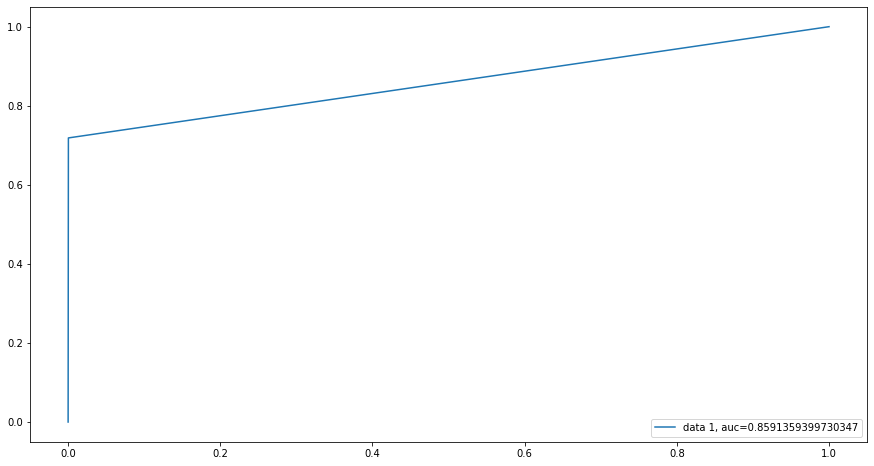

In [47]:
#vendo a Área sob a Curva usando o class_weight
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test_o,  y_pred_4)
auc = roc_auc_score(y_test_o, y_pred_4)
plt.figure(figsize=(15,8))
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### Avaliando o modelo após o balanceamento  - Teste original (y_pred_3)

In [48]:
#visualizando a matriz de confusão
confusion_matrix(y_test,y_pred_3)

array([[85264,    31],
       [   42,   106]])

In [49]:
#vendo o classification report
print(classification_report(y_test, y_pred_3))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.77      0.72      0.74       148

    accuracy                           1.00     85443
   macro avg       0.89      0.86      0.87     85443
weighted avg       1.00      1.00      1.00     85443



In [50]:
#vendo a acurácia
accuracy_score(y_test, y_pred_3)*100

99.91456292499093

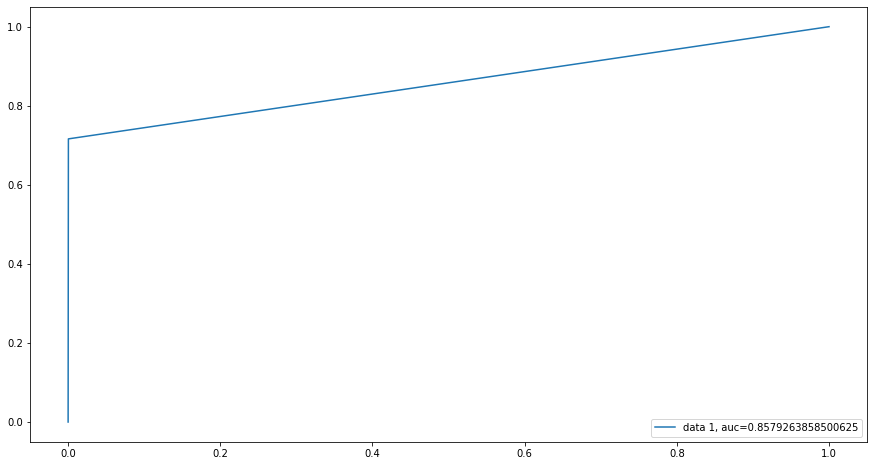

In [51]:
#vendo a Área sob a Curva usando o class_weight
fpr, tpr, _ = roc_curve(y_test,  y_pred_3)
auc = roc_auc_score(y_test, y_pred_3)
plt.figure(figsize=(15,8))
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# BALANCEAMENTO COM SMOTE

In [52]:
from imblearn.over_sampling import SMOTE

In [53]:
smote = SMOTE()

In [54]:
#fazendo o resample nos dados de treino
X_train_smote, y_train_smote = smote.fit_resample(X_train,y_train)

In [55]:
#fazendo o resample nos dados de teste
X_test_smote, y_test_smote = smote.fit_resample(X_test,y_test)

In [56]:
#ver a proporção entre as classes no novo y - que é um numpy array
unique, counts = np.unique(y_train_smote, return_counts=True)
dict(zip(unique, counts))

{0: 199020, 1: 199020}

In [57]:
#ver a proporção entre as classes no novo y - que é um numpy array
unique, counts = np.unique(y_test_smote, return_counts=True)
dict(zip(unique, counts))

{0: 85295, 1: 85295}

## TREINANDO UM MODELO COM OS DADOS BALANCEADOS COM SMOTE

In [58]:
modelo_v4 = DecisionTreeClassifier(criterion='entropy')

In [59]:
#ajustando aos dados tratados com smote
modelo_v4.fit(X_train_smote,y_train_smote)

DecisionTreeClassifier(criterion='entropy')

In [60]:
#predizendo os dados de teste balanceados com smote
y_pred_5 = modelo_v4.predict(X_test_smote)

In [61]:
#predizendo o teste original
y_pred_6 = modelo_v4.predict(X_test)

#### Avaliando o modelo com o teste balanceado (y_pred_5)

In [62]:
#visualizando a matriz de confusão
confusion_matrix(y_test_smote,y_pred_5)

array([[85158,   137],
       [ 8536, 76759]])

In [63]:
#vendo o classification report
print(classification_report(y_test_smote, y_pred_5))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     85295
           1       1.00      0.90      0.95     85295

    accuracy                           0.95    170590
   macro avg       0.95      0.95      0.95    170590
weighted avg       0.95      0.95      0.95    170590



In [64]:
#vendo a acurácia
accuracy_score(y_test_smote, y_pred_5)*100

94.91588018054986

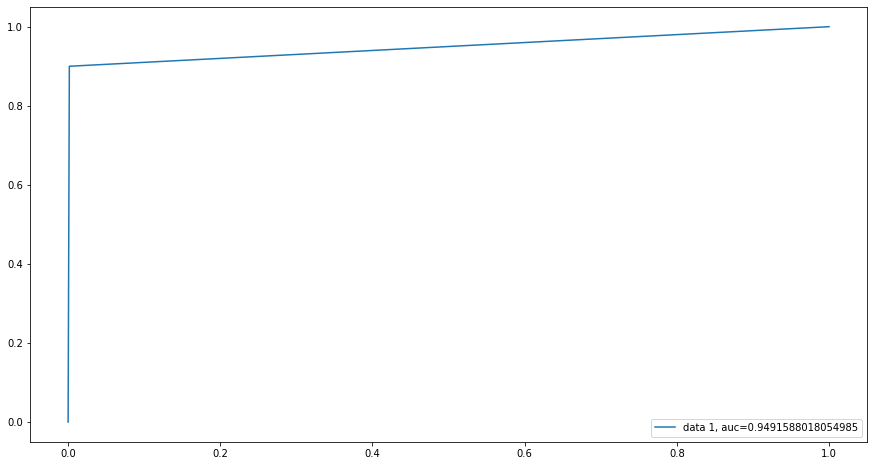

In [65]:
#vendo a Área sob a Curva usando o class_weight
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test_smote,  y_pred_5)
auc = roc_auc_score(y_test_smote, y_pred_5)
plt.figure(figsize=(15,8))
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

#### Avaliando o modelo com os dados originais (y_pred_6)

In [66]:
#visualizando a matriz de confusão
confusion_matrix(y_test,y_pred_6)

array([[85158,   137],
       [   28,   120]])

In [67]:
#vendo o classification report
print(classification_report(y_test, y_pred_6))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.47      0.81      0.59       148

    accuracy                           1.00     85443
   macro avg       0.73      0.90      0.80     85443
weighted avg       1.00      1.00      1.00     85443



In [68]:
#vendo a acurácia
accuracy_score(y_test, y_pred_6)*100

99.80688880306168

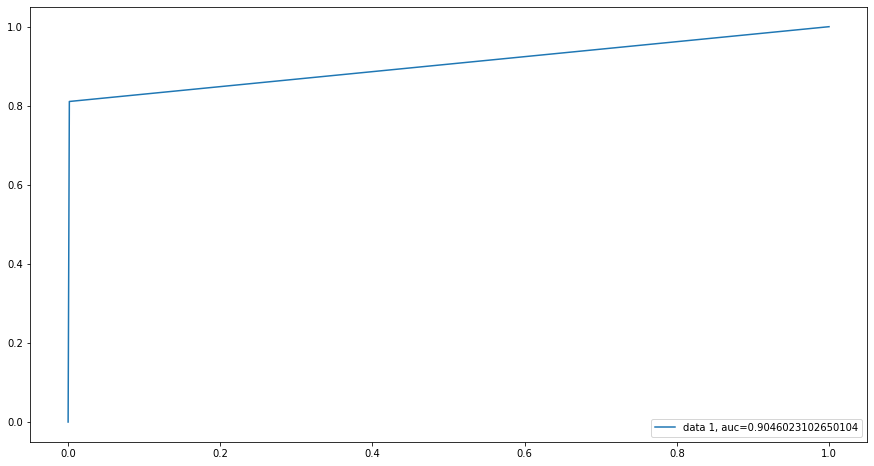

In [69]:
#vendo a Área sob a Curva usando o class_weight
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test,  y_pred_6)
auc = roc_auc_score(y_test, y_pred_6)
plt.figure(figsize=(15,8))
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# USANDO OS DADOS DO SCRIPT R

In [70]:
#pegando os dados do R
rose_treino = pd.read_csv('rose_treino.csv')

In [71]:
rose_teste = pd.read_csv('rose_teste.csv')

In [72]:
#teste desbalanceado
teste_R = pd.read_csv('teste_R.csv')

### Lendo os dados

In [73]:
rose_treino.head()

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1,217205.803513,-2.567981,0.898000,-0.767780,-2.728384,1.208778,-2.414597,0.820543,-0.291104,-1.322237,-0.986977,-1.773612,0.146018,0.294645,-0.890830,-1.912879,1.275707,0.867205,-0.210741,-0.442621,0.786827,0.428279,-0.225452,-0.701389,-0.199779,1.595748,-0.147785,-0.372765,-0.628274,160.405993,0
1,2,152178.961131,2.464177,0.769727,-1.677835,-0.264555,-0.752586,-0.444199,0.736922,0.516300,-0.333578,-0.471416,1.857264,0.445935,-0.247741,1.609412,-1.949613,0.008885,-0.406072,0.012527,0.556883,-1.052852,0.179824,-0.879074,0.671705,-0.040643,-0.617697,0.575995,-0.431744,0.018294,280.848610,0
2,3,182977.585124,-0.928121,-0.347480,-0.562512,0.324371,0.141313,1.307359,-0.128218,-0.978227,-0.779199,-1.961890,-1.267183,-0.237118,-0.394160,-0.653186,-0.410073,-1.107511,1.331703,-0.485902,0.016075,0.170843,-0.142135,0.152564,0.278665,1.235203,0.032195,0.843445,-0.154998,-0.157450,258.813132,0
3,4,125476.880682,-5.294014,-7.711289,-0.187482,0.446199,5.035787,-3.538694,-3.209072,-0.210478,0.789281,-0.214555,0.994566,0.438681,-1.441440,0.722324,-0.311711,-3.100765,-0.468878,1.904907,-0.779730,1.658596,0.579284,0.368786,1.080375,0.389435,0.095096,-0.034558,-0.230594,0.054191,169.302354,0
4,5,109467.436111,-3.310566,2.543741,-0.454611,-1.164950,-0.014708,-0.371611,-1.120068,-3.462906,2.214135,-0.178497,-0.395631,-3.075713,2.190316,0.706173,-0.357781,0.386493,0.262908,0.092927,-0.522715,-1.023052,2.406482,-1.435943,0.564870,-0.595498,-0.913191,0.085156,0.123373,-0.002864,19.754487,0


In [74]:
rose_teste.head()

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1,100451.654404,0.835494,-0.515926,-1.917480,2.981701,-0.351667,-0.322559,-1.019767,0.854651,-0.396209,0.778483,-0.914643,-0.567016,-0.849374,0.324713,1.020657,0.559622,-0.627162,0.680035,-0.787069,-0.249650,-0.892906,-0.026410,0.222306,0.324409,0.893922,-0.455777,0.014020,0.180375,44.663140,0
1,2,89789.404102,0.796821,1.157225,0.964042,0.713635,-1.718851,-0.481958,-2.237540,-1.159084,1.449394,1.268521,-1.749091,0.640670,-0.580593,-1.279014,-0.240555,0.316832,0.292700,0.793222,-0.003040,-0.070233,-0.376944,0.445669,-0.363435,1.005757,0.197879,-0.779452,0.434642,0.060588,-4.513026,0
2,3,69703.722904,1.506110,1.500464,1.840818,-3.023737,-0.493129,0.512150,0.668140,1.061339,0.582431,-0.627479,2.122898,-0.221596,0.641509,1.255493,0.871446,-2.370964,0.642706,-0.507503,3.282407,-0.076969,0.167389,0.441469,0.128360,-0.387545,0.227522,-0.344947,0.226256,0.078189,-282.077495,0
3,4,43316.890993,-0.425023,-1.926346,2.905975,0.331543,-0.731026,-1.045221,-0.665823,0.051061,1.105838,-0.901832,-0.559504,1.512642,0.457490,-0.023867,1.941779,1.116098,-0.768118,0.583072,-0.524923,-0.350025,0.892887,0.031339,0.055278,0.458679,0.012613,0.405719,0.200270,0.239794,7.302140,0
4,5,156815.482578,0.449738,1.459230,-0.217602,-1.837296,-0.087504,-1.838171,0.180964,0.316996,0.621333,-0.920477,-1.362959,-0.178791,-1.649568,-1.221910,-0.487833,-0.074288,0.266133,-0.356626,0.269816,-0.293671,-0.120940,-1.687764,0.796283,0.446470,0.003706,0.470983,0.442681,0.207617,-41.468278,0


In [75]:
teste_R.head()

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
1,2,10,1.249999,-1.221637,0.383930,-1.234899,-1.485419,-0.753230,-0.689405,-0.227487,-2.094011,1.323729,0.227666,-0.242682,1.205417,-0.317631,0.725675,-0.815612,0.873936,-0.847789,-0.683193,-0.102756,-0.231809,-0.483285,0.084668,0.392831,0.161135,-0.354990,0.026416,0.042422,121.50,0
2,3,12,1.103215,-0.040296,1.267332,1.289091,-0.735997,0.288069,-0.586057,0.189380,0.782333,-0.267975,-0.450311,0.936708,0.708380,-0.468647,0.354574,-0.246635,-0.009212,-0.595912,-0.575682,-0.113910,-0.024612,0.196002,0.013802,0.103758,0.364298,-0.382261,0.092809,0.037051,12.99,0
3,4,13,-0.436905,0.918966,0.924591,-0.727219,0.915679,-0.127867,0.707642,0.087962,-0.665271,-0.737980,0.324098,0.277192,0.252624,-0.291896,-0.184520,1.143174,-0.928709,0.680470,0.025436,-0.047021,-0.194796,-0.672638,-0.156858,-0.888386,-0.342413,-0.049027,0.079692,0.131024,0.89,0
4,5,15,1.492936,-1.029346,0.454795,-1.438026,-1.555434,-0.720961,-1.080664,-0.053127,-1.978682,1.638076,1.077542,-0.632047,-0.416957,0.052011,-0.042979,-0.166432,0.304241,0.554432,0.054230,-0.387910,-0.177650,-0.175074,0.040002,0.295814,0.332931,-0.220385,0.022298,0.007602,5.00,0


## Excluir a coluna Unnamed:0

In [76]:
#visualizar o nome das colunas
rose_treino.columns


Index(['Unnamed: 0', 'Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8',
       'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18',
       'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',
       'Amount', 'Class'],
      dtype='object')

Drop

In [77]:
#usando o drop
rose_treino.drop('Unnamed: 0', axis=1, inplace=True)

In [78]:
rose_treino.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
30191,45623.998433,-2.141849,-1.563667,0.357752,-3.017143,-0.697561,0.236699,0.041557,-0.614703,2.644723,-1.581650,-0.610949,-0.145553,0.165572,-1.119258,1.082461,0.160088,-0.962151,0.876433,-1.379555,-0.646794,-0.343279,0.426708,-0.805724,-1.469022,-1.077744,0.090441,-0.062625,-0.030369,-37.080948,0
193986,249.853178,0.920770,5.784827,-0.763626,5.961053,-2.411932,-1.313100,1.923384,-0.597457,-0.785586,-3.036742,0.216224,-7.284895,0.313090,-3.620139,1.482953,0.665739,3.754144,-3.118919,-0.144585,1.170027,4.467077,-0.072527,0.083980,-0.209276,0.658030,0.805220,2.090273,-0.025895,73.771440,1
170393,45961.100566,-10.685780,7.276770,-18.248579,6.686179,-13.766032,0.700795,-16.288833,-5.082312,-5.974129,-20.079995,6.781700,-7.473708,-0.021990,-5.706400,-0.890369,-10.371415,-19.893449,-5.979666,1.812376,2.061566,-2.070915,2.996462,1.766947,-0.719116,-2.012886,-1.106298,-3.385727,-0.600117,-53.625038,1
128015,183868.502333,-0.022860,3.833515,-18.789901,4.263165,0.353958,-3.295040,-0.620221,-3.077055,-3.888187,-11.689395,6.189319,-3.253330,1.005027,-8.134219,-0.399945,-0.328858,-5.557462,-3.397815,-1.970404,-1.045130,-1.545333,-1.602742,-0.649895,-0.022006,0.141343,0.550671,1.705015,0.208205,-27.802115,1
133259,4199.902889,-23.063133,9.079597,-21.474930,5.331687,-14.692995,-2.624223,-10.704655,8.253358,-7.174103,1.611425,1.738331,-7.828641,0.886543,-3.343034,1.888382,-5.432358,-8.232539,-5.871094,0.091628,0.734730,1.918596,-2.399417,-0.909069,0.528903,1.503696,-0.082077,2.481267,-0.110213,-145.508162,1


Set_Index

In [79]:
rose_teste.set_index('Unnamed: 0', inplace=True)

In [80]:
rose_teste.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,100451.654404,0.835494,-0.515926,-1.917480,2.981701,-0.351667,-0.322559,-1.019767,0.854651,-0.396209,0.778483,-0.914643,-0.567016,-0.849374,0.324713,1.020657,0.559622,-0.627162,0.680035,-0.787069,-0.249650,-0.892906,-0.026410,0.222306,0.324409,0.893922,-0.455777,0.014020,0.180375,44.663140,0
2,89789.404102,0.796821,1.157225,0.964042,0.713635,-1.718851,-0.481958,-2.237540,-1.159084,1.449394,1.268521,-1.749091,0.640670,-0.580593,-1.279014,-0.240555,0.316832,0.292700,0.793222,-0.003040,-0.070233,-0.376944,0.445669,-0.363435,1.005757,0.197879,-0.779452,0.434642,0.060588,-4.513026,0
3,69703.722904,1.506110,1.500464,1.840818,-3.023737,-0.493129,0.512150,0.668140,1.061339,0.582431,-0.627479,2.122898,-0.221596,0.641509,1.255493,0.871446,-2.370964,0.642706,-0.507503,3.282407,-0.076969,0.167389,0.441469,0.128360,-0.387545,0.227522,-0.344947,0.226256,0.078189,-282.077495,0
4,43316.890993,-0.425023,-1.926346,2.905975,0.331543,-0.731026,-1.045221,-0.665823,0.051061,1.105838,-0.901832,-0.559504,1.512642,0.457490,-0.023867,1.941779,1.116098,-0.768118,0.583072,-0.524923,-0.350025,0.892887,0.031339,0.055278,0.458679,0.012613,0.405719,0.200270,0.239794,7.302140,0
5,156815.482578,0.449738,1.459230,-0.217602,-1.837296,-0.087504,-1.838171,0.180964,0.316996,0.621333,-0.920477,-1.362959,-0.178791,-1.649568,-1.221910,-0.487833,-0.074288,0.266133,-0.356626,0.269816,-0.293671,-0.120940,-1.687764,0.796283,0.446470,0.003706,0.470983,0.442681,0.207617,-41.468278,0


Subset

In [81]:
teste_R.columns

Index(['Unnamed: 0', 'Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8',
       'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18',
       'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',
       'Amount', 'Class'],
      dtype='object')

In [82]:
teste_r = teste_R[['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8',
       'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18',
       'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',
       'Amount', 'Class']]

In [83]:
teste_r.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
85438,172770,2.007418,-0.280235,-0.208113,0.335261,-0.715798,-0.751373,-0.458972,-0.140140,0.959971,-0.028284,-0.635200,0.869261,0.996596,-0.280317,0.436079,0.397439,-0.557940,-0.536840,-0.082349,-0.143294,-0.208260,-0.430347,0.416765,0.064819,-0.608337,0.268436,-0.028069,-0.041367,3.99,0
85439,172770,-0.446951,1.302212,-0.168583,0.981577,0.578957,-0.605641,1.253430,-1.042610,-0.417116,0.076605,-1.291228,-0.690868,-1.481724,0.753473,-0.191141,-1.129904,0.319074,-0.201862,0.744416,-0.203306,0.851800,0.305268,-0.148093,-0.038712,0.010209,-0.362666,0.503092,0.229921,60.50,0
85440,172780,1.884849,-0.143540,-0.999943,1.506772,-0.035300,-0.613638,0.190241,-0.249058,0.666458,0.120908,-1.134176,0.677729,0.345928,0.002019,-0.679626,-0.549982,-0.199950,-0.420551,-0.283278,-0.153997,0.144008,0.634646,-0.042114,-0.053206,0.316403,-0.461441,0.018265,-0.041068,60.00,0
85441,172783,-1.775135,-0.004235,1.189786,0.331096,1.196063,5.519980,-1.518185,2.080825,1.159498,-0.594242,-1.264072,0.453596,-0.243142,-0.858719,-0.766554,-0.644646,0.447184,0.388721,0.792135,0.348176,0.103302,0.654850,-0.348929,0.745323,0.704545,-0.127579,0.454379,0.130308,79.99,0
85442,172788,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0


## Dividindo entre X e Y

$X$ = variáveis explicativas

$y$ = variável alvo

### Dados de Treino

In [84]:
#Drops
X_train_r = rose_treino.drop('Class', axis='columns')


In [85]:
X_train_r.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,217205.803513,-2.567981,0.898000,-0.767780,-2.728384,1.208778,-2.414597,0.820543,-0.291104,-1.322237,-0.986977,-1.773612,0.146018,0.294645,-0.890830,-1.912879,1.275707,0.867205,-0.210741,-0.442621,0.786827,0.428279,-0.225452,-0.701389,-0.199779,1.595748,-0.147785,-0.372765,-0.628274,160.405993
1,152178.961131,2.464177,0.769727,-1.677835,-0.264555,-0.752586,-0.444199,0.736922,0.516300,-0.333578,-0.471416,1.857264,0.445935,-0.247741,1.609412,-1.949613,0.008885,-0.406072,0.012527,0.556883,-1.052852,0.179824,-0.879074,0.671705,-0.040643,-0.617697,0.575995,-0.431744,0.018294,280.848610
2,182977.585124,-0.928121,-0.347480,-0.562512,0.324371,0.141313,1.307359,-0.128218,-0.978227,-0.779199,-1.961890,-1.267183,-0.237118,-0.394160,-0.653186,-0.410073,-1.107511,1.331703,-0.485902,0.016075,0.170843,-0.142135,0.152564,0.278665,1.235203,0.032195,0.843445,-0.154998,-0.157450,258.813132
3,125476.880682,-5.294014,-7.711289,-0.187482,0.446199,5.035787,-3.538694,-3.209072,-0.210478,0.789281,-0.214555,0.994566,0.438681,-1.441440,0.722324,-0.311711,-3.100765,-0.468878,1.904907,-0.779730,1.658596,0.579284,0.368786,1.080375,0.389435,0.095096,-0.034558,-0.230594,0.054191,169.302354
4,109467.436111,-3.310566,2.543741,-0.454611,-1.164950,-0.014708,-0.371611,-1.120068,-3.462906,2.214135,-0.178497,-0.395631,-3.075713,2.190316,0.706173,-0.357781,0.386493,0.262908,0.092927,-0.522715,-1.023052,2.406482,-1.435943,0.564870,-0.595498,-0.913191,0.085156,0.123373,-0.002864,19.754487


In [86]:
#subset
y_train_r = rose_treino.Class

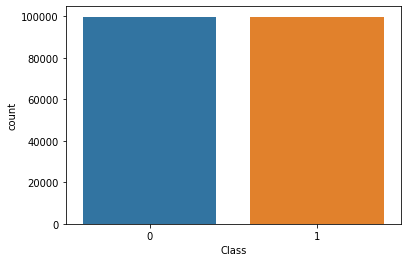

In [87]:
#conferindo o balanceamento das classes no treino
sns.countplot(y_train_r);

### Dados de Teste balanceados

In [88]:
#seleção de features
rose_teste.columns


Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [89]:
#selecionando as features e o label
features = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']
label = 'Class'

In [90]:
#criando o subset
X_test_r = rose_teste[features]

In [91]:
X_test_r.head(1)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,100451.654404,0.835494,-0.515926,-1.91748,2.981701,-0.351667,-0.322559,-1.019767,0.854651,-0.396209,0.778483,-0.914643,-0.567016,-0.849374,0.324713,1.020657,0.559622,-0.627162,0.680035,-0.787069,-0.24965,-0.892906,-0.02641,0.222306,0.324409,0.893922,-0.455777,0.01402,0.180375,44.66314


In [92]:
y_test_r = rose_teste[label]
y_test_r.head()

Unnamed: 0
1    0
2    0
3    0
4    0
5    0
Name: Class, dtype: int64

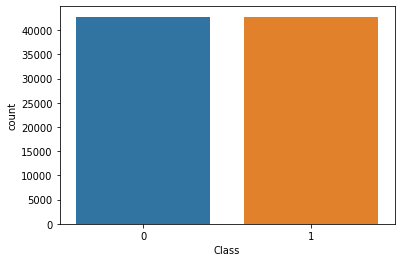

In [93]:
sns.countplot(y_test_r);

### Dados de teste sem balanceamento

In [94]:
X_teste_r = teste_r.drop('Class', axis=1)
y_teste_r = teste_r['Class']

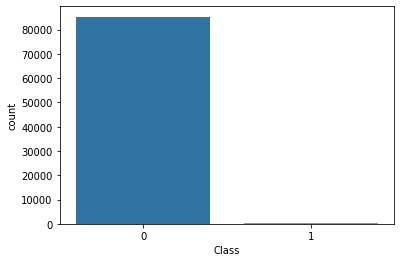

In [95]:
sns.countplot(y_teste_r)
plt.show()

## Criando o modelo para os dados do R


In [96]:
#criando o modelo
modelo_v5 = DecisionTreeClassifier(criterion='entropy')

In [97]:
#ajustando o modelo aos dados de treino
modelo_v5.fit(X_train_r, y_train_r)

DecisionTreeClassifier(criterion='entropy')

In [98]:
#predizendo o teste balanceado
y_pred_7 = modelo_v5.predict(X_test_r)

In [99]:
#predizendo o teste sem balanceamento
y_pred_8 = modelo_v5.predict(X_teste_r)

In [100]:
#predizendo o teste original
y_pred_9 = modelo_v5.predict(X_test)

## Avaliar o modelo com os dados do R

### Avaliando o modelo com os dados balanceados (y_pred_7)

In [101]:
#usando a confusion matrix
confusion_matrix(y_test_r,y_pred_7)

array([[42353,   316],
       [  403, 42371]])

In [102]:
#vendo o classification report
print(classification_report(y_test_r, y_pred_7))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     42669
           1       0.99      0.99      0.99     42774

    accuracy                           0.99     85443
   macro avg       0.99      0.99      0.99     85443
weighted avg       0.99      0.99      0.99     85443



In [103]:
#ver a acurácia do modelo
accuracy_score(y_test_r, y_pred_7)*100

99.15850332970518

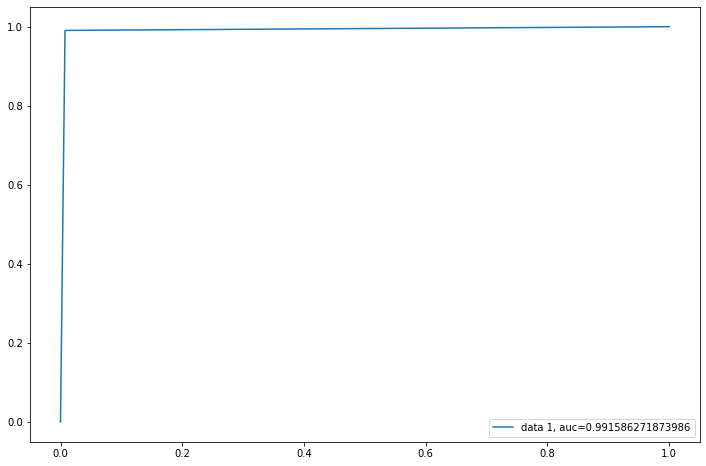

In [104]:
#gráfico da Área sob a Curva
fpr, tpr, _ = roc_curve(y_test_r,  y_pred_7)
auc = roc_auc_score(y_test_r, y_pred_7)
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### Avaliando o modelo com os dados sem balanceamento (y_pred_8)

In [105]:
#usando a confusion matrix
confusion_matrix(y_teste_r,y_pred_8)

array([[85090,   212],
       [   27,   114]])

In [106]:
#vendo o classification report
print(classification_report(y_teste_r, y_pred_8))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85302
           1       0.35      0.81      0.49       141

    accuracy                           1.00     85443
   macro avg       0.67      0.90      0.74     85443
weighted avg       1.00      1.00      1.00     85443



In [107]:
#ver a acurácia do modelo
accuracy_score(y_teste_r, y_pred_8)*100

99.7202813571621

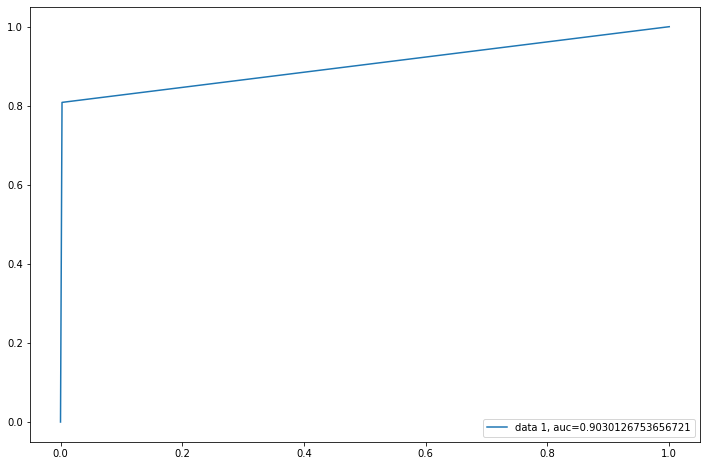

In [108]:
#gráfico da Área sob a Curva
fpr, tpr, _ = roc_curve(y_teste_r,  y_pred_8)
auc = roc_auc_score(y_teste_r, y_pred_8)
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### Avaliando o modelo com o teste original (y_pred_9)

In [109]:
#usando a confusion matrix
confusion_matrix(y_test,y_pred_9)

array([[85108,   187],
       [   34,   114]])

In [110]:
#vendo o classification report
print(classification_report(y_test, y_pred_9))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.38      0.77      0.51       148

    accuracy                           1.00     85443
   macro avg       0.69      0.88      0.75     85443
weighted avg       1.00      1.00      1.00     85443



In [111]:
#ver a acurácia do modelo
accuracy_score(y_test, y_pred_9)*100

99.74134803319173

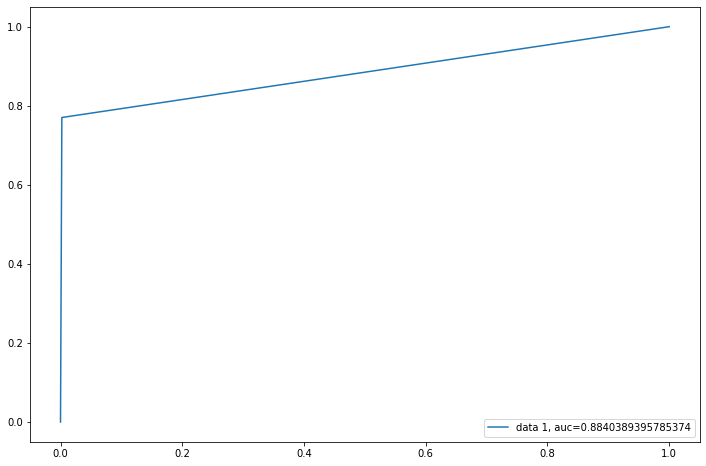

In [112]:
#gráfico da Área sob a Curva
fpr, tpr, _ = roc_curve(y_test,  y_pred_9)
auc = roc_auc_score(y_test, y_pred_9)
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# RODANDO UM AUTOML

## Pycaret

In [113]:
#!pip install pycaret

In [114]:
#!pip install tpot

In [115]:
from pycaret.classification import *

In [117]:
#fazendo o setup e escolhendo os dados 
setup(data = rose_treino, target ='Class')

Setup Succesfully Completed!


,Description,Value
0,session_id,4376
1,Target Type,Binary
2,Label Encoded,"0: 0, 1: 1"
3,Original Data,"(199364, 31)"
4,Missing Values,False
5,Numeric Features,30
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


(                 Time        V1         V2  ...       V27       V28      Amount
 0       217205.803513 -2.567981   0.898000  ... -0.372765 -0.628274  160.405993
 1       152178.961131  2.464177   0.769727  ... -0.431744  0.018294  280.848610
 2       182977.585124 -0.928121  -0.347480  ... -0.154998 -0.157450  258.813132
 3       125476.880682 -5.294014  -7.711289  ... -0.230594  0.054191  169.302354
 4       109467.436111 -3.310566   2.543741  ...  0.123373 -0.002864   19.754487
 ...               ...       ...        ...  ...       ...       ...         ...
 199359  125425.327156 -2.490395   6.199844  ... -0.209445 -1.042581  677.645646
 199360   20328.369295 -1.441320   4.867258  ... -1.862583  0.040780 -199.652155
 199361   67602.297127 -0.286126 -13.001091  ...  0.210092  0.009773  140.976120
 199362  140527.616884  4.706068   6.388379  ...  0.765785  0.499481  286.169822
 199363   58137.551655 -0.533701   7.697579  ...  0.916655  0.729042 -304.884391
 
 [199364 rows x 30 columns

In [118]:
#comparando modelos
compare_models(sort='AUC')


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,CatBoost Classifier,0.9989,1.0000,0.9987,0.9990,0.9989,0.9978,0.9978,54.7243
1,Extra Trees Classifier,0.9989,0.9999,0.9992,0.9986,0.9989,0.9978,0.9978,19.5500
2,Extreme Gradient Boosting,0.9959,0.9998,0.9949,0.9969,0.9959,0.9918,0.9918,27.2576
3,Random Forest Classifier,0.9976,0.9997,0.9984,0.9968,0.9976,0.9952,0.9952,12.9059
4,Gradient Boosting Classifier,0.9958,0.9997,0.9951,0.9964,0.9958,0.9915,0.9915,215.0006
5,Light Gradient Boosting Machine,0.9984,0.9996,0.9982,0.9986,0.9984,0.9968,0.9968,3.1678
6,Ada Boost Classifier,0.9916,0.9995,0.9891,0.9941,0.9916,0.9831,0.9832,40.2255
7,Naive Bayes,0.9506,0.9971,0.9084,0.9923,0.9485,0.9012,0.9045,0.0808
8,Quadratic Discriminant Analysis,0.9871,0.9951,0.9996,0.9751,0.9872,0.9741,0.9744,0.2709
9,Decision Tree Classifier,0.9908,0.9908,0.9905,0.9911,0.9908,0.9816,0.9816,20.6867


In [119]:
#criando o modelo
cat = create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9984,0.9999,0.9984,0.9984,0.9984,0.9968,0.9968
1,0.9991,1.0000,0.9989,0.9994,0.9991,0.9983,0.9983
2,0.9989,1.0000,0.9987,0.9991,0.9989,0.9979,0.9979
3,0.9986,1.0000,0.9980,0.9991,0.9986,0.9971,0.9971
4,0.9990,1.0000,0.9991,0.9989,0.9990,0.9980,0.9980
5,0.9989,0.9999,0.9983,0.9996,0.9989,0.9979,0.9979
6,0.9993,1.0000,0.9991,0.9994,0.9993,0.9986,0.9986
7,0.9991,1.0000,0.9989,0.9994,0.9991,0.9983,0.9983
8,0.9986,1.0000,0.9987,0.9984,0.9986,0.9971,0.9971
9,0.9989,1.0000,0.9991,0.9986,0.9989,0.9977,0.9977


In [120]:
cat_tunado = tune_model(cat)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9988,0.9999,0.9989,0.9987,0.9988,0.9976,0.9976
1,0.9994,1.0000,0.9994,0.9994,0.9994,0.9989,0.9989
2,0.9991,1.0000,0.9989,0.9993,0.9991,0.9981,0.9981
3,0.9986,1.0000,0.9981,0.9991,0.9986,0.9973,0.9973
4,0.9991,1.0000,0.9991,0.9990,0.9991,0.9981,0.9981
5,0.9989,1.0000,0.9980,0.9997,0.9989,0.9977,0.9977
6,0.9993,1.0000,0.9990,0.9996,0.9993,0.9986,0.9986
7,0.9994,1.0000,0.9990,0.9997,0.9994,0.9987,0.9987
8,0.9988,1.0000,0.9989,0.9987,0.9988,0.9976,0.9976
9,0.9989,1.0000,0.9990,0.9989,0.9989,0.9979,0.9979


In [126]:
#!pip install shaP

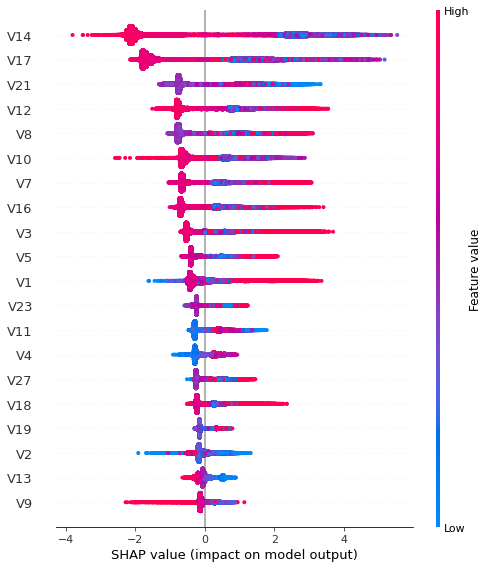

In [124]:
#plotando o modelo antes do tuning
interpret_model(cat)

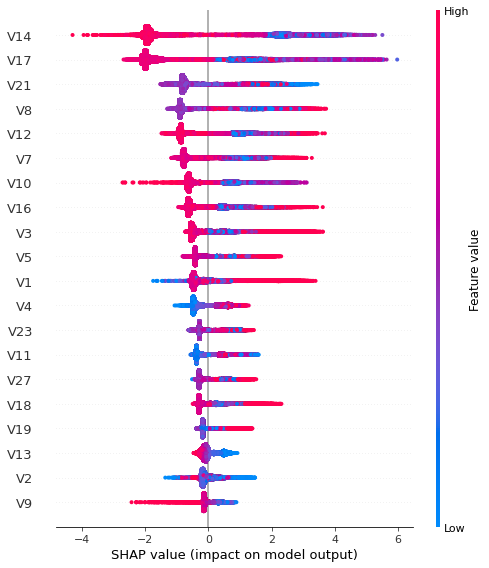

In [125]:
#plotando o modelo depois do tuning
interpret_model(cat_tunado)

In [127]:
#predições nos dados não balanceados
predictions_n = predict_model(cat_tunado, data = teste_r)

In [ ]:
#verificando as variáveis de saída
predictions_n.info()

In [151]:
#transformando o tipo de dado para inteiros
y_pred_10 = predictions_n.Label.astype(int)

In [152]:
#separando os dados
y_true_10 = predictions_n.Class

In [157]:
#predições do DS balanceado
predictions_b = predict_model(cat_tunado, data=rose_teste)

In [160]:
#conferindo nulos
predictions_b.isna().sum()


Time      1
V1        1
V2        1
V3        1
V4        1
V5        1
V6        1
V7        1
V8        1
V9        1
V10       1
V11       1
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
Label     1
Score     1
dtype: int64

In [163]:
#dropando a primeira linha do dataset
predictions_b.drop(index=0, axis=0, inplace=True)

In [166]:
predictions_b.isna().sum().sum()

1

In [167]:
#criando o y_true e o y_pred do teste balanceado
y_pred_11 = predictions_b.Label.astype(int)
y_true_11 = predictions_b.Class

### Avaliando as previsões do PyCaret

Com os dados desbalanceados

In [153]:
#confusion matrix
confusion_matrix(y_true_10, y_pred_10)

array([[85268,    34],
       [   27,   114]])

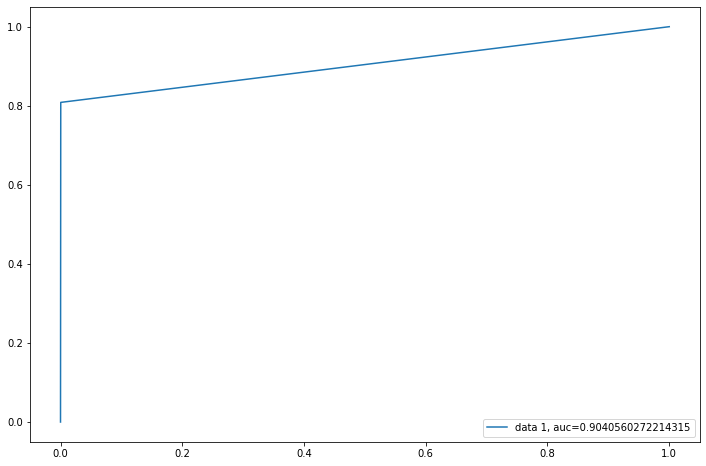

In [154]:
#Curva AUC
fpr, tpr, _ = roc_curve(y_true_10,  y_pred_10)
auc = roc_auc_score(y_true_10,  y_pred_10)
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

Com o teste balanceado

In [168]:
#confusion matrix
confusion_matrix(y_true_11, y_pred_11)

array([[42633,    36],
       [  102, 42672]])

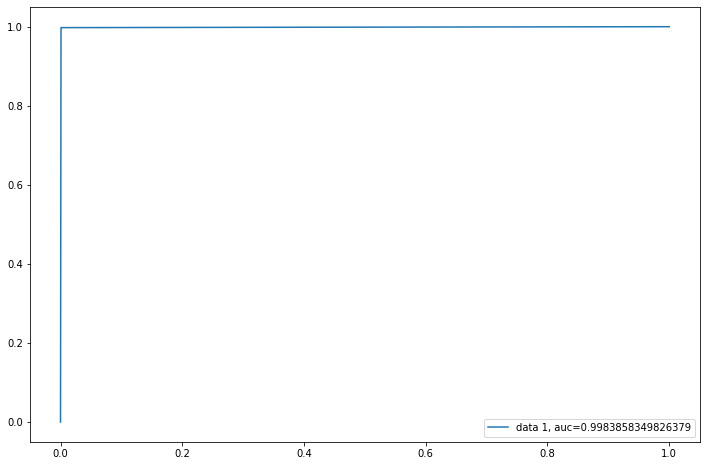

In [169]:
#Curva AUC
fpr, tpr, _ = roc_curve(y_true_11,  y_pred_11)
auc = roc_auc_score(y_true_11,  y_pred_11)
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

TPOT

In [170]:
from tpot import TPOTClassifier

In [171]:
tpot = TPOTClassifier(generations=1, verbosity=2)

In [ ]:
tpot.fit(X_train_r, y_train_r)